# Clean and Analyse Star Wars Survey 

The dataset comes from a survey taken by star wars fans where they were asked general things about them and the franchise. We will use this data to answer questions like:

- Which one of the 6 films do the fans like the most?
- Which one is the most watch film by the fans?
- Do the answers to the last two questions differ by gender?
- Which character is the most liked/disliked by the fans?

# Introduction 

Read the data and explore some of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Clean Data

The data is relatively messy but we can understand everything we will do the following clean up steps to make the data easier to analyze.

# Remove Null Values

- Remove any row that has a null value for the RespondentID.

In [4]:
# Remove rows that are null in the RespondentID
star_wars = star_wars[star_wars["RespondentID"].notnull()]

# Check that all the NaN rows were removed
star_wars["RespondentID"].isnull().sum()

0

# Convert to Bool Values

- Replace the following two columns answers of Yes or No to True or False respectively.
- Look at the seen columns, replace the movie titles with True or False, assuming NaN is False.
- Rename seen columns titles more simple column titles.

In [5]:
# Replace Yes or No with True or False
yes_no = {"Yes": True, "No": False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = \
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

# Check the column has been changed
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]= \
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

# Check the column has been changed
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
# List of all star wars movies in question
titles = ["Star Wars: Episode I  The Phantom Menace", 
          "Star Wars: Episode II  Attack of the Clones", 
          "Star Wars: Episode III  Revenge of the Sith",
          "Star Wars: Episode IV  A New Hope",
         "Star Wars: Episode V The Empire Strikes Back",
         "Star Wars: Episode VI Return of the Jedi"]

def title_bool(title):
    if title in titles:
        return True
    else:
        return False
    
# Replace movie titles with True and Nan with False
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(title_bool)

In [8]:
# Rename columns 
seen_titles = {"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
             "Unnamed: 4":"seen_2",
             "Unnamed: 5":"seen_3",
             "Unnamed: 6":"seen_4",
             "Unnamed: 7":"seen_5",
             "Unnamed: 8":"seen_6"}

star_wars = star_wars.rename(columns=seen_titles)

# Check the new columns names the values were changed
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


# Convert to Numeric Values

- Make the ranked columns numerical values.
- Rename ranked columns to more simple column titles.
- Make the character columns numerical values.
- Rename character columns to the name of characters.

In [9]:
# Convert the rank columns in to numerical values
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
# Rename columns
rank_titles ={"Please rank the Star Wars films in order of preference with "
              "1 being your favorite film in the franchise and 6 being your "
              "least favorite film.":"ranking_1",
             "Unnamed: 10":"ranking_2",
             "Unnamed: 11":"ranking_3",
             "Unnamed: 12":"ranking_4",
             "Unnamed: 13":"ranking_5",
             "Unnamed: 14":"ranking_6"}

star_wars = star_wars.rename(columns=rank_titles)

# Check new column names and numerical values
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [11]:
# Convert character columns values to numberic
new_char_ranking = {"Very favorably":5, "Somewhat favorably":4, "Neither favorably nor unfavorably (neutral)":3,
                    "Unfamiliar (N/A)":2, np.nan:2, "Somewhat unfavorably":1, "Very unfavorably":0}

def char_numeric(char): 
    return new_char_ranking[char]

star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].applymap(char_numeric)

In [12]:
# Rename columns
char_titles = {"Please state whether you view the following characters favorably, "
               "unfavorably, or are unfamiliar with him/her.":"Han Solo", 
               "Unnamed: 16":"Luke Skywalker", "Unnamed: 17":"Princess Leia Organa", 
               "Unnamed: 18":"Anakin Skywalker", "Unnamed: 19":"Obi Wan Kenobi", "Unnamed: 20":"Emperor Palpatine", 
               "Unnamed: 21":"Darth Vader", "Unnamed: 22":"Lando Calrissian", "Unnamed: 23":"Boba Fett", 
               "Unnamed: 24":"C-3P0", "Unnamed: 25":"R2 D2", "Unnamed: 26":"Jar Jar Binks", 
               "Unnamed: 127":"Padme Amidala", "Unnamed: 28":"Yoda"}

star_wars = star_wars.rename(columns=char_titles)

# Check new column names and values
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Unnamed: 27,Yoda
1,5,5,5,5,5,5,5,2,2,5,5,5,5,5
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,4,4,4,4,4,2,2,2,2,2,2,2,2,2
4,5,5,5,5,5,4,5,4,1,5,5,5,5,5
5,5,4,4,1,5,0,4,3,5,4,4,0,4,4


# Highest Ranked Movie

Separating the ranked columns and tanking the mean of all the rows will give us a good view of how much the fans liked each movie.

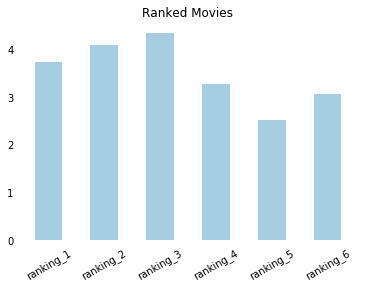

In [13]:
# Calculate the mean of each rank column
mean_ranks = star_wars.iloc[:,9:15].mean()

# Plot the mean ranks using a bar graph
mean_ranks.plot(kind='bar', rot=30, colormap='Paired')
plt.title("Ranked Movies")
plt.box(False) # Remove boarder
plt.tick_params(top=False, bottom=False, left=False, right=False) # Remove graph ticks

Note that the lower the value the higher the movie was ranked. The graph shows that the first 3 movies got progressively worse while the last 3 movies were good. This could be because the first 3 are so old that the respondents have forgotten most of the movie and have ranked the ones fresher in their minds are being better. Or it could be that the sci-fi has gotten so much better in the newer movies. Either way  the best movie is Star Wars: Episode V The Empire Strikes Back, and the worse being Star Wars: Episode III  Revenge of the Sith.

# Most Watched Movie

Separating the seen columns and taking the sum of the rows will give us a good understanding of which movie was watched the most.

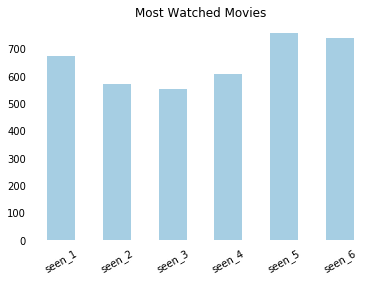

In [14]:
# Calculate how many times each movie has been seen
seen_sum = star_wars.iloc[:,3:9].sum()

# Plot how many times each movie has been seen a bar graph
seen_sum.plot(kind='bar', rot=30, colormap='Paired')
plt.title("Most Watched Movies")
plt.box(False) # Remove the boarder
plt.tick_params(top=False, bottom=False, left=False, right=False) # Remove graph ticks

The most-watched movies are the last two, this makes the ranking of the movies make more sense that the respondents have watched the last two movie more than the other ones. Similarly the 2nd and 3rd movies were the least-watched movies and also the lowest-ranked movies.

# Male vs. Female

Lets explore weather males and females rank and watch the movies differently.

In [15]:
# Sliping the data to male and female
male = star_wars[star_wars["Gender"]=="Male"]
female = star_wars[star_wars["Gender"]=="Female"]

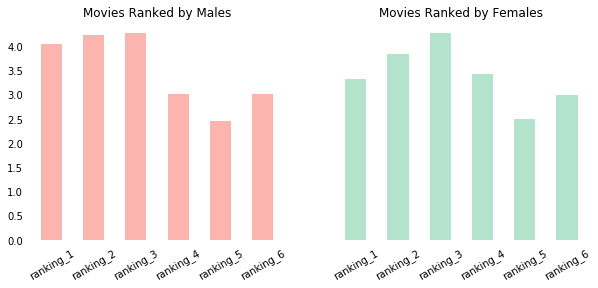

In [16]:
# Calculate the mean of each rank column for male
male_ranks = male.iloc[:,9:15].mean()

# Calculate the mean of each rank column for female
female_ranks = female.iloc[:,9:15].mean()

# Plot the mean ranks for male and female using a bar graph
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

spine_list = ["right", "left", "top", "bottom"] 
for i in range(0,2): # Remove the boarder for both graphs
    for j in spine_list:
        ax[i].spines[j].set_visible(False)
              
male_ranks.plot(kind='bar', ax=ax[0], rot=30, colormap='Pastel1')
ax[0].set_title("Movies Ranked by Males")
ax[0].tick_params(bottom=False, top=False, left=False, right=False) # Remove graph ticks

female_ranks.plot(kind='bar', ax=ax[1], rot=30, colormap='Pastel2')
ax[1].set_title("Movies Ranked by Females")
ax[1].tick_params(bottom=False, top=False, 
                  left=False, right=False, labelleft=False) # Remove graph ticks and left label

Remember that the lower the value the higher the movie was ranked. The last 4 movies are similarly ranked by males and females but there are some differences with the first two movies. In general, males ranked the first two movies lower than females.

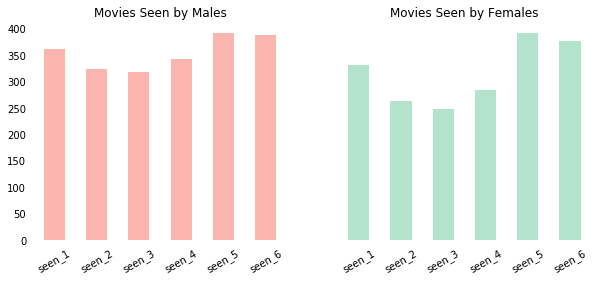

In [17]:
# Calculate how many times each movie has been seen for male
male_seen = male.iloc[:,3:9].sum()

# Calculate how many times each movie has been seen for female
female_seen = female.iloc[:,3:9].sum()

# Plot how many times each movie has been seen by males and females using a bar graph
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i in range(0,2): # Remove the boarder for both graphs
    for j in spine_list:
        ax[i].spines[j].set_visible(False)

male_seen.plot(kind='bar', ax=ax[0], rot=30, colormap='Pastel1')
ax[0].set_title("Movies Seen by Males")
ax[0].tick_params(bottom=False, top=False, left=False, right=False) # Remove graph ticks


female_seen.plot(kind='bar', ax=ax[1], rot=30, colormap='Pastel2')
ax[1].set_title("Movies Seen by Females")
ax[1].tick_params(bottom=False, top=False, 
                  left=False, right=False, labelleft=False) # Remove graph ticks and left label

These graphs show that males have seen all the movies consistently while most females have seen the last two movies a lot more. This lets us know that the rankings that the males have given are more reliable and consistent because they have seen all the movies about the same amount.

# Best Character 

Taking the mean of the row of each character column will give us a good understanding of what the favorite characters are in the franchise.

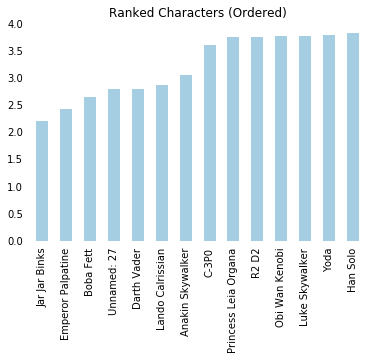

In [18]:
# Calculate the mean rank each character column
char_rank_mean = star_wars.iloc[:,15:29].mean().sort_values()

# Plot the mean ranks for each character using a bar graph
char_rank_mean.plot(kind='bar', rot=90 , colormap='Paired')
plt.title("Ranked Characters (Ordered)")
plt.box(False) # Remove boarder
plt.tick_params(top=False, bottom=False, left=False, right=False) # Remove graph ticks

By the graph we can see that about half of the characters are loved while the other half not so much, leaving Han Solo as the best character in the franchise and Jar Jar Binks as the worse.

# Conclusion

From the analysis above we can conclude that the highest-ranked movie from the Star Wars franchise so far is Star Wars: Episode V The Empire Strikes Back which is also the most-watched movie out of the six. We learned that there is a difference between the male fans and the female fans, while the male fans are consistent and have seen all 6 movies the females have seen the last two movies a lot more. although there is a difference in the movies they watch they still ranked the last three movies better than the last three. Lastly, we found out that Jar Jar Binks was the least liked character and Han Solo the favorite character of the franchise.